# FP1: Massenspektrometer

## Init
(pakete laden, funktionen definieren, plotstyle definieren)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import uncertainties as unc
import uncertainties.unumpy as unp

## Ergebnisse

### Aufgabe 1

Aus dem ersten aufgenommenen Spektrum sollen die Primärionen und Wassercluster identifiziert werden. In der untenstehenden Abbildung ist das aufgenommene Spektrum zu sehen. Da die Versuche nur mit Ionisation mit Wasserdampf ablaufen, sind keine Ammoniakcluster zu erwarten. Für das Primärion H<sub>3</sub>O<sup>+</sup> ist ein Peak bei 19.0814 Th zu erwarten, für den Wassercluster ein Peak bei 37.02897 Th. Die Einheit Thomson (Th) ist hierbei definiert als $$1\:\mathrm{Th}=\frac{1\:\mathrm{u}}{e}.$$

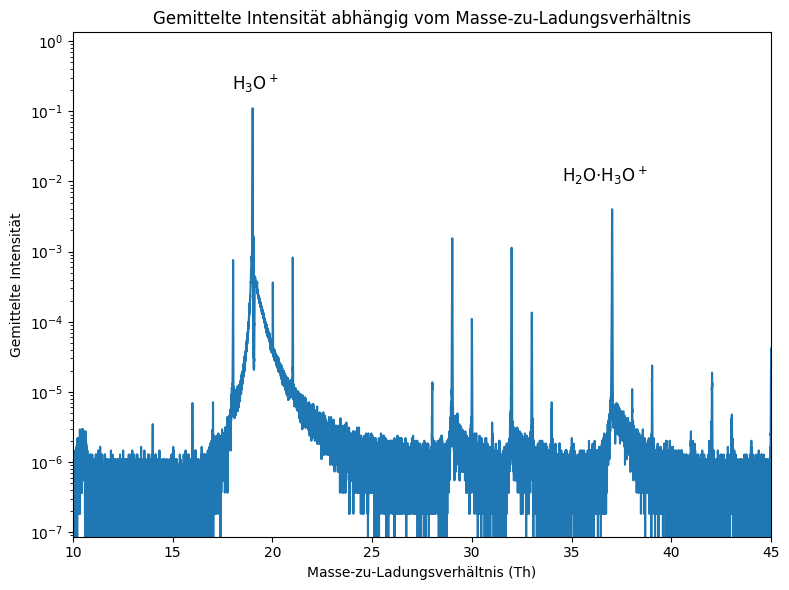

In [13]:
# Datei einlesen
df = pd.read_csv(r'Ex1.1.txt', sep='\t', skiprows=11, header=0)

# Die letzten drei Spalten auswählen
df = df[['mass', 'tof (mus)', 'Average']]

#Jetzt wird geplottet
plt.figure(figsize=(8,6))
plt.plot(df['mass'], df['Average'] )
plt.yscale('log')
#Jetzt wird die x che eingeschränkt auf  1 bis 50
plt.xlim(10, 45)
plt.xlabel('Masse-zu-Ladungsverhältnis (Th)')
#Testbeschriftung für den funkt 19, 10^-1 
plt.text(18, 10**-1+0.1 , 'H$_3$O$^+$', fontsize=12, color='black')
plt.text(34.5, 10**-2 , 'H$_2$O$\cdot$H$_3$O$^+$', fontsize=12, color='black')
plt.ylabel('Gemittelte Intensität')
plt.title('Gemittelte Intensität abhängig vom Masse-zu-Ladungsverhältnis')
#plt.legend()
plt.tight_layout()
plt.show()

Mithilfe von Fits an die Peaks im Spektrum (in TofDAQ Viewer erstellt) erhalten wir ein Masse-zu-Ladungsverhältnis von 19.01271 Th für das Primärion H<sub>3</sub>O<sup>+</sup>, für den Wassercluster H<sub>2</sub>O $\cdot $ H<sub>3</sub>O<sup>+</sup>ergibt sich 37.02609 Th. Die Abweichung vom Messergebnis zum Literaturwert beträgt also nur 0.35 % bzw 0.007 %, die Messergebnisse unterstützen also die berechneten Werte. 

Ein Fragment von C<sub>6</sub>H<sub>4</sub>ClI
 liegt bei einem Massen-Ladungsverhältnis von 112. Bei der gesuchten Fragmentation wird das Iod-Atom aus dem Molekül entfernt, man erhält dann das Molekül C<sub>6</sub>H<sub>4</sub>ClIH<sup>+</sup>. Die atomare Masse dieses Moleküls beträgt 112 unit, beziehungsweise ein Massen-Ladungsverhältnis von 112 unit/$e$. Dabei entsteht dieser Peak beim Standardvorkommen aller Moleküle, also $^{12}_6\mathrm{C}$, $^{1}_1\mathrm{H}$ und $^{35}_{17}\mathrm{Cl}$. Die Struktur des ursprünglichen Moleküls. in untenstehender Abbildung ist die Struktur von 1-Chlor-4-iodbenzol zu sehen, man kann gut erkennen, wie bei der Fragmentation das Iod entfernt wird. 

 ![Struktur von 1-Chlor-4-iodbenzol](http://www.strukturformelzeichner.de/strukturformeln/sf20240508/sfz20240508-182315-235-11d80291.png)








Was ändert sich beim Variieren der Spannungen?


Für das Kalibrieren der Massenachse wurden drei Peaks verwendet. Hier wurden die Peaks von zwei Isotopen von C<sub>6</sub>H<sub>4</sub>ClI, nämlich bei 238.9125 Th und bei 240,90168 Th verwendet. Zudem wird mit dem Peak bei 21.0226 Th eines H<sub>3</sub>O-isotops kalibriert. Aufgrund der Totzeit können manche Peaks nicht vollständig aufgezeichnet werden, sondern brechen nach einem gewissen Anstieg ab. Dadurch kann weder die Höhe, noch die genau Position des Peaks bestimmt werden. Dies tritt beispielsweise beim Peak bei 19.0184 Th auf, der deshalb nicht für die Kalibrierung verwendet werden kann. 

In [9]:
def init_df(name):
    # load df
    df = pd.read_csv(f'data/{name}.txt', sep='\t', skiprows=11, header=0, encoding='iso-8859-1')
    # add column with indeces
    df['index'] = np.arange(len(df))
    df.columns = ['m', "tof", 'avg', 'index']
    return df

### Aufgabe 2

In [10]:
# load background
backdf = init_df('Background')
df = init_df('Ex2.4')
df["davg"] = df.avg - backdf.avg

In [22]:
def lorentz(x, A, x0, gamma, c):
    return A * gamma**2 / ((x - x0)**2 + gamma**2) + c


def m_to_idx(m, df):
    return df[df.m > m].iloc[0, 3]

             m      tof           avg  index          davg
58442  41.6876  11.6884  2.774080e-07  58442 -3.205970e-07
58443  41.6891  11.6886  5.548160e-07  58443 -2.425240e-07
58444  41.6905  11.6888  2.774080e-07  58444 -2.159500e-08
58447  41.6949  11.6894  5.548160e-07  58447 -2.425240e-07
58450  41.6992  11.6900  5.548160e-07  58450 -1.428570e-07
...        ...      ...           ...    ...           ...
58911  42.3700  11.7822  2.774080e-07  58911 -2.209300e-07
58912  42.3715  11.7824  0.000000e+00  58912 -6.976730e-07
58915  42.3759  11.7830  2.774080e-07  58915 -1.212620e-07
58919  42.3817  11.7838  0.000000e+00  58919 -5.980050e-07
58920  42.3832  11.7840  2.774080e-07  58920 -2.209300e-07

[182 rows x 5 columns]
             m      tof           avg  index          davg
60475  44.6856  12.0950  5.548160e-07  60475 -1.428570e-07
60476  44.6871  12.0952  2.774080e-07  60476 -1.212620e-07
60478  44.6901  12.0956  5.548160e-07  60478 -1.428570e-07
60481  44.6946  12.0962  0.00000

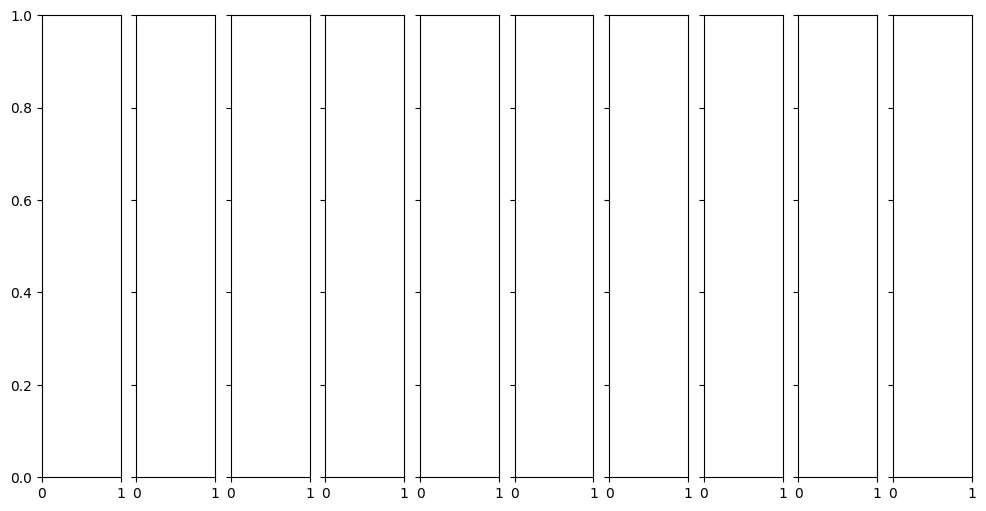

In [12]:
# find first index where df.m > 44.5
peaks = [42.034, 45.034, 59.049, 61.029, 63.027, 71.049, 79.054, 101.097, 129.127, 137.133]

fig, ax = plt.subplots(1, len(peaks), figsize=(12, 6), sharey=True)

for (i, peak) in enumerate(peaks):
    # print(i)
    start, stop = m_to_idx(peak - 0.35, df), m_to_idx(peak + 0.35, df)
    tempdf = df[start:stop]
    print(tempdf[tempdf.davg < 0])
    # tempdf.loc["davg", :] = np.log(tempdf["davg"])
    # 
    # ax[i].scatter(tempdf.m, tempdf.davg, s=4)
    # ax[i].scatter(tempdf.m[:100], tempdf.davg[:100], s=4, c='r')
    # 
    # # approximate offset with mean of first and last 10 values
    # offset = np.mean(tempdf.davg[:100])
    # print(offset)
    # 
    # # fit lorentz to data
    # if max(tempdf.davg) > np.mean(tempdf.davg) + 2* np.std(tempdf.davg):
    #     popt, pcov = curve_fit(lorentz, tempdf.m, tempdf.davg - offset, p0=[1e-5, peak, 0.01])
    #     ax[i].plot(tempdf.m, lorentz(tempdf.m, *popt) + offset, c="C1")
    # 
    # ax[i].axhline(offset, color='r')   
    # plt.xlim(44.5, 45.5)
    
    # plt.yscale('log')
# plt.plot()

In [133]:
df[df.avg < 0]

,m,tof,avg,index,davg


### Aufgabe 3

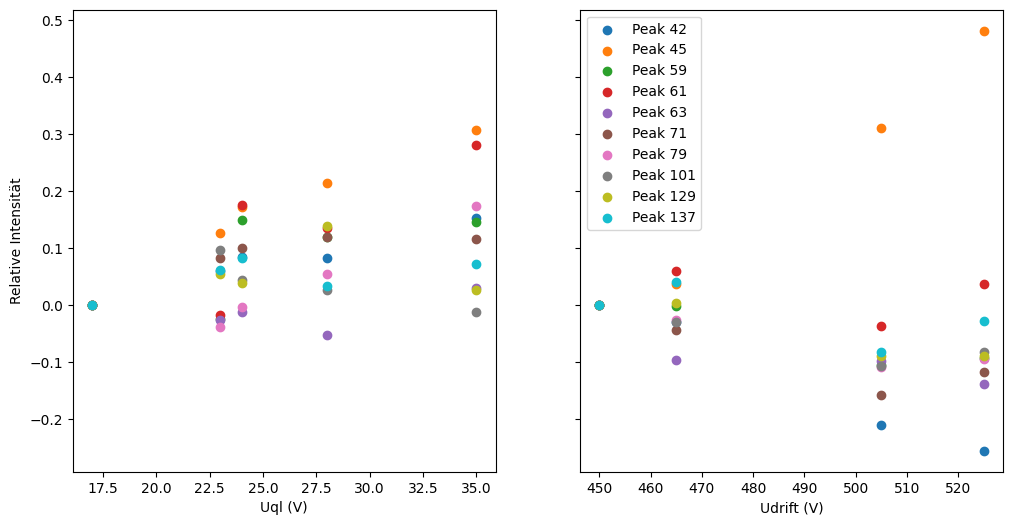

In [207]:
def t_to_idx(t, df):
    return df[df.t > t].iloc[0, 0]


Uql = [17, 23, 24, 28, 35]
Udrift = [450, 465, 505, 525, 580]
tql = [0, 65, 135, 205, 285, int(df.t.iloc[-1])]
tdrift = [0, 115, 225, 355, 465, int(df.t.iloc[-1])]

# add U and t to array to iterate over
Uall = np.array([Uql, Udrift])
tall = np.array([tql, tdrift])


fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for j in range(2):
    U, t = Uall[j], tall[j]
    # load data
    df = pd.read_csv(f'data/Ex3.{j+1}.txt', sep='\t', skiprows=6, header=0)
    # rename columns
    df.columns = ["idx", "t", *[f"m{i+1}" for i in range(len(df.columns)-2)]]
    # iterate through masses
    for peak in np.rint(peaks):
        peak = int(peak)
        # create temporary array for data
        tempy = unp.uarray(np.zeros(len(U)), np.zeros(len(U)))
        # iterate through voltages
        for (i, _) in enumerate(U):
            # exclude data within 5s of log entry to avoid transient effects and time inaccuracy
            start, stop = t_to_idx(t[i] + 5, df), t_to_idx(t[i+1] - 5, df)
            # calculate mean and std of relevant data
            mean, std = np.mean(df[f"m{peak}"][start:stop]), np.std(df[f"m{peak}"][start:stop])
            # plt.plot(df.t[Ut[i]+2:Ut[i+1]-2], df["m45"][Ut[i]+2:Ut[i+1]-2], label=f"U = {U} V")
            tempy[i] = unc.ufloat(mean, std)
        
        # create relative plot
        tempy = tempy/tempy[0] - 1 
        # plt.errorbar(U, unp.nominal_values(tempy), yerr=unp.std_devs(tempy), fmt='o', label=f"Peak {peak}")
        ax[j].scatter(U, unp.nominal_values(tempy), label=f"Peak {peak}")
    
ax[0].set_xlabel('Uql (V)')
ax[1].set_xlabel('Udrift (V)')
ax[0].set_ylabel('Relative Intensität')

plt.legend()
# plt.yscale('log')
# plt.plot(df.t, df[f"m{i+1}"], label=f"U = {U} V")

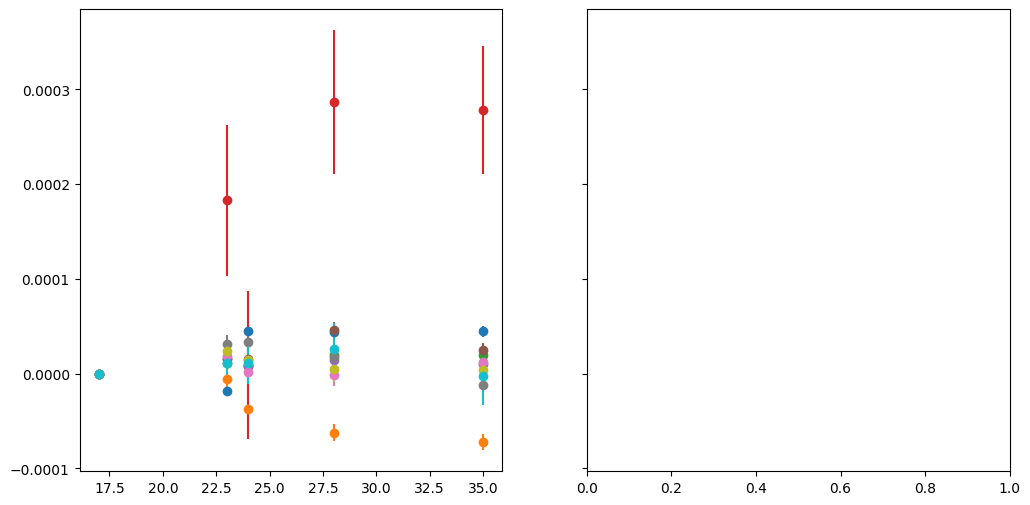

In [37]:
# load data

Uql = [17, 23, 24, 28, 35]
Udrift = [450, 465, 505, 525, 580]

tempy = unp.uarray(np.zeros(len(Uql)), np.zeros(len(Uql)))

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for (i, peak) in enumerate(peaks):
    for (j, U) in enumerate(Udrift):
        # load data
        df = init_df(f'Ex3.2_{j+1}')
        start, stop = m_to_idx(peak - 0.35, df), m_to_idx(peak + 0.35, df)
        tempdf = df[start:stop]
        
        popt, pcov = curve_fit(lorentz, tempdf.m, tempdf.avg, p0=[1e-5, peak, 0.01, 0])
        tempy[j] = unc.ufloat(popt[1], np.sqrt(np.diag(pcov))[1])
        # tempfy
    tempy = tempy/tempy[0] - 1
    # ax.scatter(Uql, unp.nominal_values(tempy), s=10)
    ax[0].errorbar(Uql, unp.nominal_values(tempy), yerr=unp.std_devs(tempy), fmt="o")
    # ax[0].plot(tempdf.m, lorentz(tempdf.m, *popt), c="C1")
    
    # plt.yscale('log')

In [198]:
df[df.t > 2]

,idx,t,m1,m2,m3,m4,m5,m6,m7,m8,...,m270,m271,m272,m273,m274,m275,m276,m277,m278,m279
2,2,2.00974,0.001298,0.000632,0.000699,0.000932,0.000766,0.000533,0.000499,0.000333,...,0.000067,0.000067,0.000067,0.000067,0.000100,0.000000,0.000100,0.000033,0.000100,0.000067
3,3,3.01475,0.001332,0.000965,0.001032,0.000866,0.000899,0.000466,0.000599,0.000599,...,0.000067,0.000067,0.000100,0.000033,0.000067,0.000133,0.000067,0.000067,0.000067,0.000100
4,4,4.01852,0.002031,0.001032,0.000866,0.000699,0.000566,0.000632,0.000266,0.000466,...,0.000100,0.000100,0.000100,0.000166,0.000133,0.000067,0.000100,0.000166,0.000133,0.000067
5,5,5.02306,0.001531,0.000732,0.000766,0.000832,0.000832,0.000399,0.000632,0.000533,...,0.000100,0.000067,0.000000,0.000133,0.000033,0.000233,0.000100,0.000033,0.000033,0.000100
6,6,6.02773,0.001731,0.001198,0.000699,0.000732,0.000699,0.000566,0.000466,0.000533,...,0.000200,0.000033,0.000000,0.000033,0.000133,0.000067,0.000100,0.000100,0.000033,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,369,370.96800,0.001731,0.000965,0.001332,0.000866,0.000932,0.000832,0.000932,0.000566,...,0.000166,0.000100,0.000166,0.000100,0.000067,0.000067,0.000133,0.000133,0.000133,0.000133
370,370,371.97400,0.001964,0.001132,0.000965,0.000766,0.001099,0.000799,0.000499,0.000599,...,0.000133,0.000100,0.000166,0.000133,0.000100,0.000166,0.000100,0.000100,0.000133,0.000133
371,371,372.97900,0.001598,0.001132,0.000666,0.000666,0.000965,0.000732,0.000599,0.000499,...,0.000000,0.000166,0.000100,0.000067,0.000133,0.000067,0.000100,0.000033,0.000200,0.000100
372,372,373.98300,0.001398,0.001298,0.001032,0.000699,0.001198,0.000433,0.000499,0.000433,...,0.000266,0.000133,0.000100,0.000166,0.000033,0.000233,0.000100,0.000100,0.000067,0.000133
